# Loading libraries



In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
%matplotlib inline

Source of Dataset: https://osmihelp.org/research

"With over 1200 responses, we believe the 2014 Mental Health in Tech Survey was the largest survey done on mental health in the tech industry."

Problem Statements :

1. Create a model that, to a satisfying extent, has the ability to predict if an employee in the tech-industry would seek out mental-health treatment.

2. Figure out what the key features are which have the potential to lead to a mental health problem in the tech-industry.

Business use-case

Core of the Problem: Almost 86% of employees report improved work performance and lower rates of absenteeism after receiving treatment for depression, according to an April 2018 article in the Journal of Occupational and Environmental Medicine. This shows the employers and companies an effective method to increase their ability to retain valuable employees. By providing employees access to mental health benefits, the company can begin to create a culture of understanding at their tech-firms. And having employees who feel cared for is not just the right thing to do, but it’s also good for business.

Source - Journal of Occupational and Environmental Medicine: April 2018 - Volume 60 - Issue 4 - p 322-330
doi: 10.1097/JOM.0000000000001271

The models developed here can provide companies with a tool to better understand the mental-health challenges of their employees, and how to effectively use company resources to handle them. Furthermore, the models can provide assistance in finding cost-cutting methods to prevent employees from seeking expensive treatments provided by company benefits by reducing the risk of their employees suffering mental-health problems in the first place.
Increased employee satisfaction leads to a higher retention rate, which in turn leads to increased employer satisfaction.

In [2]:
# The option "parse_dates" casts any column containing dates to pd.to_datetime(). We need to provide the column containing a date
data = pd.read_csv("../data/raw/raw_menthal_health_in_tech.csv",parse_dates=['Timestamp'])
#parse_date tells the column 'Timestamp' that its datetime dtype
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
data.shape

(1259, 27)

In [4]:
data.info()
#all object except Age and Timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1259 non-null   datetime64[ns]
 1   Age                        1259 non-null   int64         
 2   Gender                     1259 non-null   object        
 3   Country                    1259 non-null   object        
 4   state                      744 non-null    object        
 5   self_employed              1241 non-null   object        
 6   family_history             1259 non-null   object        
 7   treatment                  1259 non-null   object        
 8   work_interfere             995 non-null    object        
 9   no_employees               1259 non-null   object        
 10  remote_work                1259 non-null   object        
 11  tech_company               1259 non-null   object        
 12  benefi

DATA PREPARATION/CLEANING

In [5]:
#converting all the column names into lower case
data.columns = data.columns.str.lower()

In [6]:
#checking to see for salient values like NaN and missing, etc.
data.describe(include='all')

C:\Users\User\AppData\Local\Temp\ipykernel_9524\1669283049.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
first,2014-08-27 11:29:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-02-01 23:04:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.isnull().sum()

timestamp                       0
age                             0
gender                          0
country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

age is looking like it needs work, and there are a bunch of missing values. Also, I can drop certain columns like timestamp and comment as they carry no importance in my treatment prediciton. More on that in the next cell.
Additionally, 'work_interference' will need to be looked in to. Due to the fact that there is a small number of only 18 data points 'self_employed' NaN values, we can just drop them.

In [8]:
data['country'].value_counts()
#this is misleading. Most participants are from the US. This might lead to a faulty conclusion that most people in need of treatment are from the US. 

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

I will drop the 'country' column, 'timestamp', 'comments', and the 'state' one as well. They have no bearing on my analysis, because the method of collection has not been specified and can therefore not be accurately analyzed to a satisfying degree.
Notice: 'country' and 'state' only show where collection took place, creating great imbalance, and does not specify any meaning on predicting mental health or treatment measures.
Furthermore, the number of 'self_employed' participants is negligible, while 'timestamp' is simply when the data was collected.

In [9]:
data = data.drop(['country','state','timestamp','comments', 'self_employed'], axis = 1)

In [10]:
#checking the entry types for gender, commonly a source for cleaning
data['gender'].value_counts().reset_index()

,index,gender
0,Male,615
1,male,206
2,Female,121
3,M,116
4,female,62
5,F,38
6,m,34
7,f,15
8,Make,4
9,Male,3


As expected, the gender column is a mess. Must be corrected. I will create a third gender-type called 'Other' for all those who did not answer and do not identify as Male or Female.

In [11]:
data['gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

data['gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

data["gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

In [12]:
#checking to see the new output
data['gender'].value_counts().reset_index()

,index,gender
0,Male,991
1,Female,247
2,Other,21


There is a clear imbalance of genders. Most participants of the survey are male. However, this does not suggest in any way that most people with mental-health issues identify as male. For all we know, this could imply that most employees in the tech industry are male. We just don't know from this dataset alone, because it provides no information to explain the imbalance.

Using a quick google search it was shown that the ratio of men to women in the technology industry is about 3:1. This is based on the fact that only 25% of computing and mathematical jobs in the U.S. are held by women. The U.S. is also the country where most participants answers were collected from.

In [13]:
#let us see what we can do in order to correct the 'age' column.
data['age'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72         

Negative ages, people living to a million years, and children. But not that many. Will be corrected in the cell below.

In [14]:
#locking the ages to range from 16 to 75
data.loc[data.age<12,'age']=16
data.loc[data.age>75,'age']=75

In [15]:
 #checking to see if it there's anyone younger than 16 or older than 75. should return tables with no rows.
display(data[data['age'] > 75].head())
display(data[data['age'] < 16].head()) 

,age,gender,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence


,age,gender,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence


<AxesSubplot: >

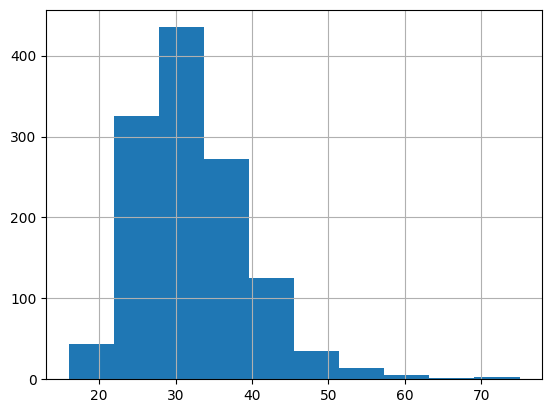

In [16]:
#looks like a realistic plot of age-ranges for working-people. that's good.
data['age'].hist()

In [17]:
round((data.isna().sum()/data.shape[0])*100,2)

age                           0.00
gender                        0.00
family_history                0.00
treatment                     0.00
work_interfere               20.97
no_employees                  0.00
remote_work                   0.00
tech_company                  0.00
benefits                      0.00
care_options                  0.00
wellness_program              0.00
seek_help                     0.00
anonymity                     0.00
leave                         0.00
mental_health_consequence     0.00
phys_health_consequence       0.00
coworkers                     0.00
supervisor                    0.00
mental_health_interview       0.00
phys_health_interview         0.00
mental_vs_physical            0.00
obs_consequence               0.00
dtype: float64

In [18]:
#dealing with the work_interfere column. after testing to find a pattern, this is the most interesting result. explanation is found below.
data[data['work_interfere'].isna()]['treatment'].value_counts()

No     260
Yes      4
Name: treatment, dtype: int64

The output of the cell above shows that out of the 264 NaN values for the question "Whether mental health interferes with work?', 260 have answered that they WOULD NOT seek treatment. Thats over 98% !
This can conclude that the NEVER response in the work_interfere column is a reasonable consideration to fill those missing values for the participants who did not fill it out.

In [19]:
#replacing NaN with Never as explained above
data['work_interfere'].fillna('Never',inplace = True)

In [20]:
#checking to see if my dataset is clean
round((data.isna().sum()/data.shape[0])*100,2)

age                          0.0
gender                       0.0
family_history               0.0
treatment                    0.0
work_interfere               0.0
no_employees                 0.0
remote_work                  0.0
tech_company                 0.0
benefits                     0.0
care_options                 0.0
wellness_program             0.0
seek_help                    0.0
anonymity                    0.0
leave                        0.0
mental_health_consequence    0.0
phys_health_consequence      0.0
coworkers                    0.0
supervisor                   0.0
mental_health_interview      0.0
phys_health_interview        0.0
mental_vs_physical           0.0
obs_consequence              0.0
dtype: float64

In [21]:
#saving clean data
data.to_csv(r'../data/clean/clean_data.csv', index=False)